## 1.  Project Title, Problem Statement & Objective

**Title**: Flipkart Customer Satisfaction Analysis and Prediction

**Problem Statement**:

In the competitive e-commerce landscape, customer satisfaction plays a crucial role in both customer retention and brand loyalty. Flipkart, as one of India's largest online retail platforms, receives a high volume of customer service interactions across multiple channels, including chat, call, and email.

The company seeks to understand the key drivers of customer satisfaction by analyzing customer feedback, issue categories, agent performance, and support channel effectiveness. Additionally, Flipkart aims to proactively identify dissatisfied customers using predictive analytics to improve service quality and reduce churn.

This project addresses the need to:
- Analyze historical customer support data to uncover patterns and pain points.
- Use sentiment analysis to evaluate customer remarks.
- Build a machine learning model to predict low satisfaction cases.
- Generate actionable recommendations for improving customer support operations.

**Objective**:  
The objective of this project is to analyze customer support interactions at Flipkart to identify the key factors influencing customer satisfaction (CSAT). The project aims to uncover insights through exploratory data analysis, sentiment analysis of customer feedback, and predictive modeling. These insights will help improve agent performance, optimize support channels, and proactively address customer concerns to enhance overall satisfaction and brand  lty.

---

## 2. Dataset Description

The dataset contains records of customer support interactions from Flipkart, including CSAT scores, feedback text, order and issue details, agent and manager names, product categories, prices, and timestamps.  

**Dataset Summary**:
- Total records: 85,907
- Total columns: 20
- Target column: CSAT Score (1 to 5)
- Features include: support channel, issue category, customer remarks, agent name, shift, tenu item price, etc.

---

## 3. Data Cleaning

Several steps were taken to clean the dataset:
- Removed columns with excessive missing values (e.g., `connected_handling_time`, `order_date_time`)
- Dropped rows with missing customer remarks where needed for sentiment analysis
- Checked for and handled missing values in fields like `Item_price`, `Product_category`, `Customer_City`
- Converted categorical variables for modeling using one-hot encoding
- Created a binary target variable for classification: Low Satisfaction (CSAT ≤ 3) vs High Satisfaction (CSAT > 3)
 ≤ 3) vs High Satisfaction (CSAT > 3)
y.


In [ ]:
pip install wordcloud

In [ ]:
pip install textblob

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Text Analysis
from wordcloud import WordCloud
from textblob import TextBlob

# Machine Learning Tools (for later)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset
df = pd.read_csv("/content/Customer_support_data.csv")

# Show the first few rows
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
# Check structure of dataset
df.info()

# Check for missing values
df.isnull().sum()

# Basic statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [ ]:
# Check all current column names
df.columns.tolist()


['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [ ]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


,0
connected_handling_time,85665
Customer_City,68828
Product_category,68711
Item_price,68701
order_date_time,68693
Customer Remarks,57165
Order_id,18232


In [ ]:
# Drop very sparse columns
df.drop(columns=['connected_handling_time', 'order_date_time'], inplace=True)

# Optional: drop rows where Customer Remarks is missing (for text/sentiment analysis)
df_text = df.dropna(subset=['Customer Remarks'])

# Show new shape of text-based DataFrame
df_text.shape


(28742, 18)

## Exploratory Data Analysis (EDA)

The goal of EDA is to uncover patterns, trends, and anomalies in the Flipkart customer support data to understand what drives customer satisfaction (CSAT). Below are the key insights discovered:

### CSAT Score Distribution
- Most customers rate their experience with a score of 4 or 5, indicating generally high satisfaction.
- A smaller segment of customers gave scores of 1 to 3, representing potential dissatisfaction.

### CSAT by Support Channel
- Support channels like Chat and Call show different levels of satisfaction.
- Some channels consistently deliver higher CSAT than others, indicating variation in experience quality.

### CSAT by Issue Category
- Certain issue categories such as Returns, Delivery Delays, and Product Issues showed lower average CSAT scores.
- These categories highlight the most critical pain points in the customer journey.

### Agent Performance Analysis
- Agent-wise average CSAT reveals significant performance differences.
- The bottom 10 agents consistently receive low CSAT scores, suggesting a need for targeted training.
- The top 10 agents perform exceptionally well, indicating best practices that can be shared.

### CSAT vs Item Price
- A scatter plot between item price and CSAT reveals no strong correlation.
- Customers appear to care more about service quality than product price when rating satisfaction.

These insights were visualized using Seaborn and Matplotlib, including countplots, boxplots, bar charts, and scatter plots.
harts, and scatter plots.


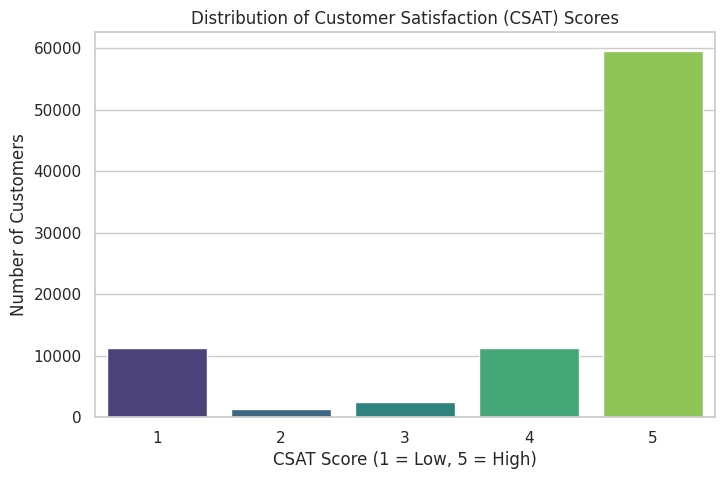

In [ ]:
# 4. Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# A. CSAT Score Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='CSAT Score', data=df, palette='viridis')
plt.title('Distribution of Customer Satisfaction (CSAT) Scores')
plt.xlabel('CSAT Score (1 = Low, 5 = High)')
plt.ylabel('Number of Customers')
plt.show()


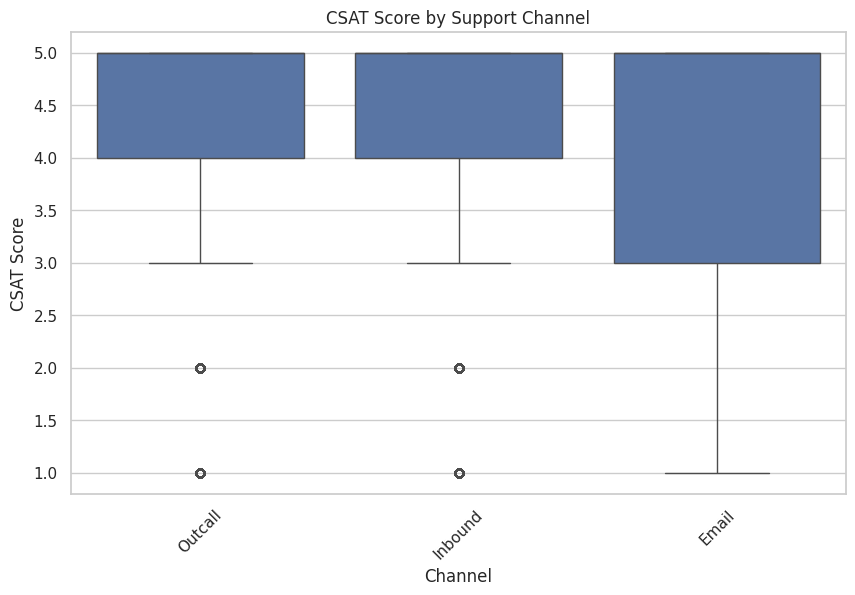

In [ ]:
# B. CSAT Score by Channel
plt.figure(figsize=(10,6))
sns.boxplot(x='channel_name', y='CSAT Score', data=df)
plt.title('CSAT Score by Support Channel')
plt.xlabel('Channel')
plt.ylabel('CSAT Score')
plt.xticks(rotation=45)
plt.show()


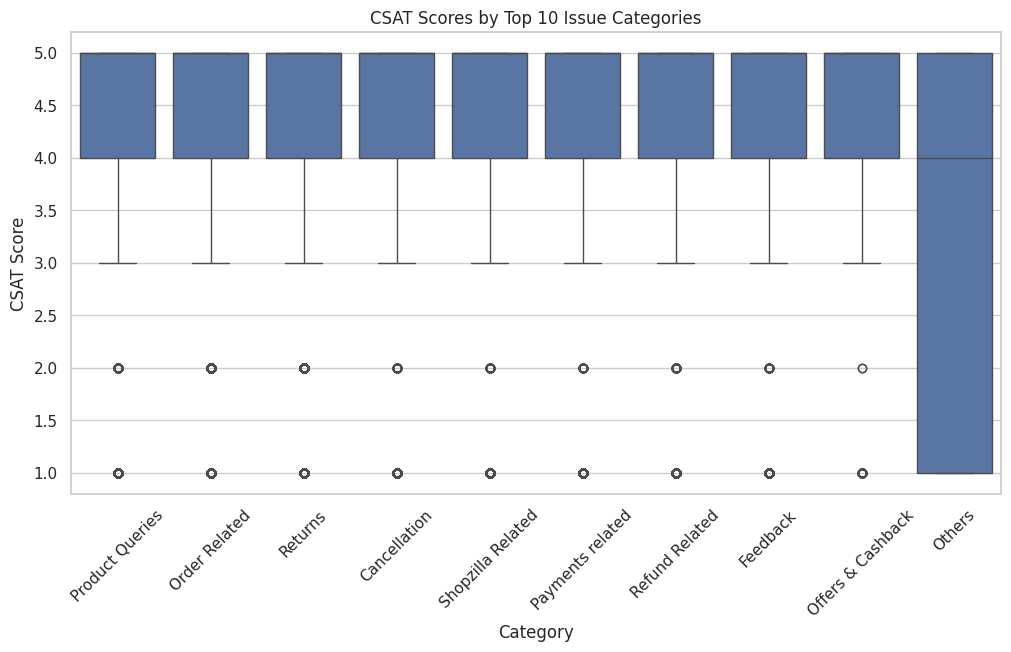

In [ ]:
# C. CSAT Score by Category (Top 10 Categories)
top_categories = df['category'].value_counts().nlargest(10).index

plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='CSAT Score', data=df[df['category'].isin(top_categories)])
plt.title('CSAT Scores by Top 10 Issue Categories')
plt.xlabel('Category')
plt.ylabel('CSAT Score')
plt.xticks(rotation=45)
plt.show()


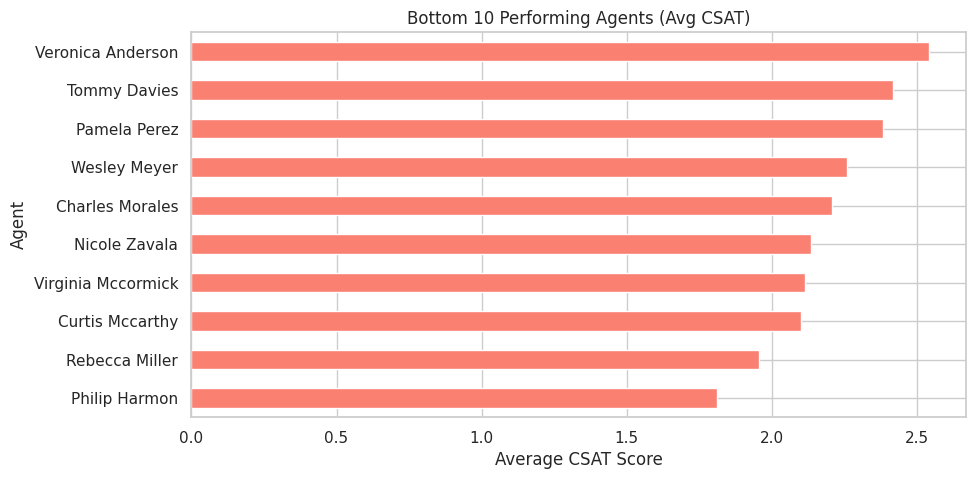

In [ ]:
# D. Agent Performance - Bottom 10 Agents
agent_scores = df.groupby('Agent_name')['CSAT Score'].mean().sort_values()

plt.figure(figsize=(10,5))
agent_scores.head(10).plot(kind='barh', color='salmon')
plt.title('Bottom 10 Performing Agents (Avg CSAT)')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent')
plt.show()


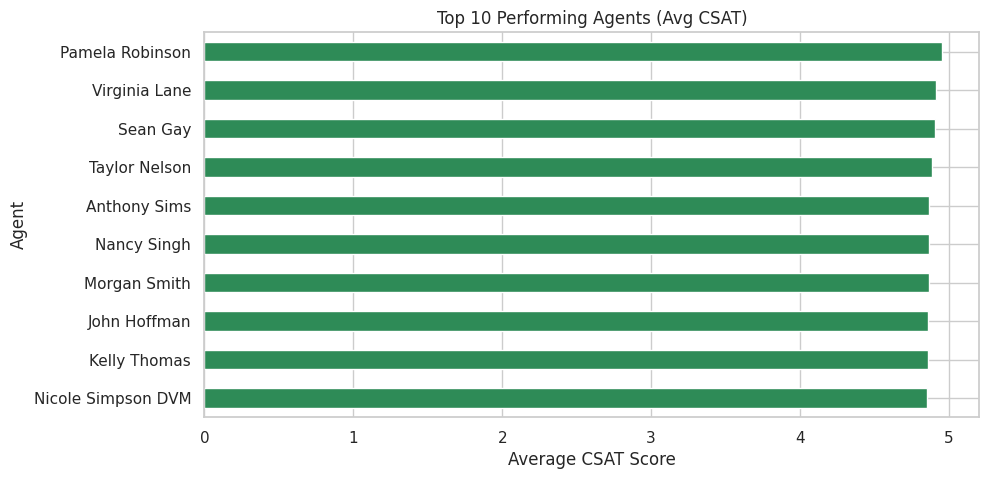

In [ ]:
# E. Agent Performance - Top 10 Agents
plt.figure(figsize=(10,5))
agent_scores.tail(10).plot(kind='barh', color='seagreen')
plt.title('Top 10 Performing Agents (Avg CSAT)')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent')
plt.show()


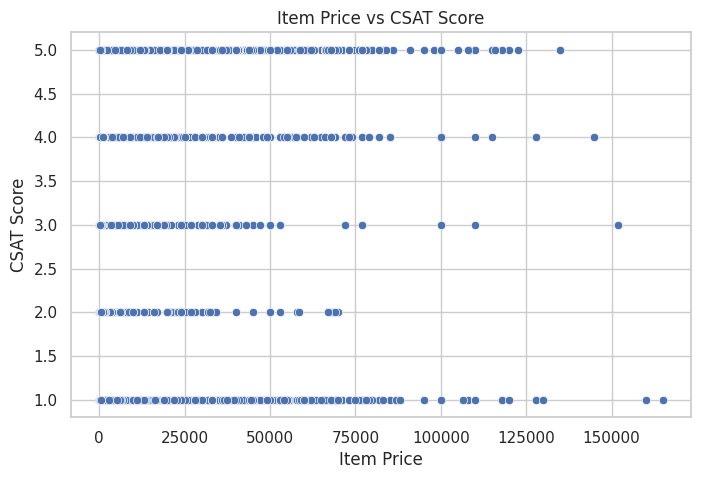

In [ ]:
# F. CSAT Score vs Item Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_price', y='CSAT Score', data=df)
plt.title('Item Price vs CSAT Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.show()


## Sentiment Analysis Summary

To better understand customer emotions and how they relate to satisfaction scores, sentiment analysis was performed on the free-text feedback in the `Customer Remarks` column using TextBlob.

Key Steps:
- Cleaned and filtered rows with non-null customer remarks.
- Calculated sentiment polarity for each remark (ranging from -1 to 1).
- Visualized sentiment polarity distribution.
- Plotted sentiment polarity vs CSAT Score to observe correlations.
- Generated WordClouds to highlight common keywords in both negative and positive feedback.

Observations:
- Negative sentiment remarks generally correlated with low CSAT scores (1–3).
- Positive sentiment remarks aligned with high CSAT scores (4–5).
- Frequent negative terms indicated issues like delays, returns, or poor agent interaction.


In [ ]:
# Create a new DataFrame with only non-null remarks
df_text = df.dropna(subset=['Customer Remarks'])

# Check the shape
df_text.shape

(28742, 18)

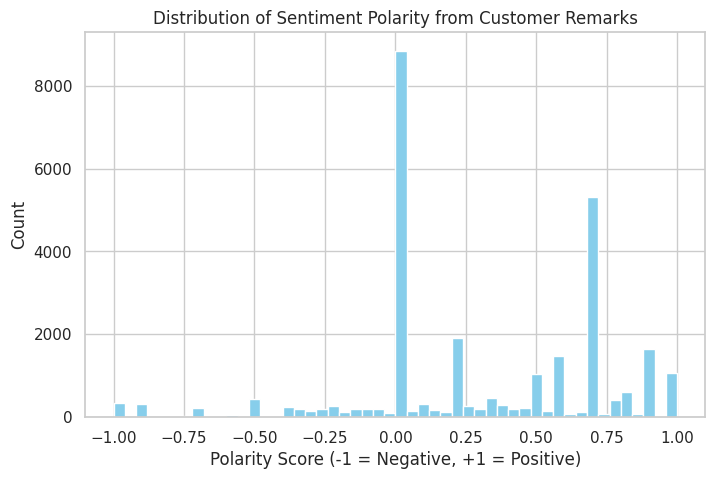

In [ ]:
# Basic Sentiment Score Using TextBlob
from textblob import TextBlob

# Function to get sentiment polarity
df_text['Sentiment_Polarity'] = df_text['Customer Remarks'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check distribution
df_text['Sentiment_Polarity'].hist(bins=50, figsize=(8,5), color='skyblue')
plt.title('Distribution of Sentiment Polarity from Customer Remarks')
plt.xlabel('Polarity Score (-1 = Negative, +1 = Positive)')
plt.ylabel('Count')
plt.show()


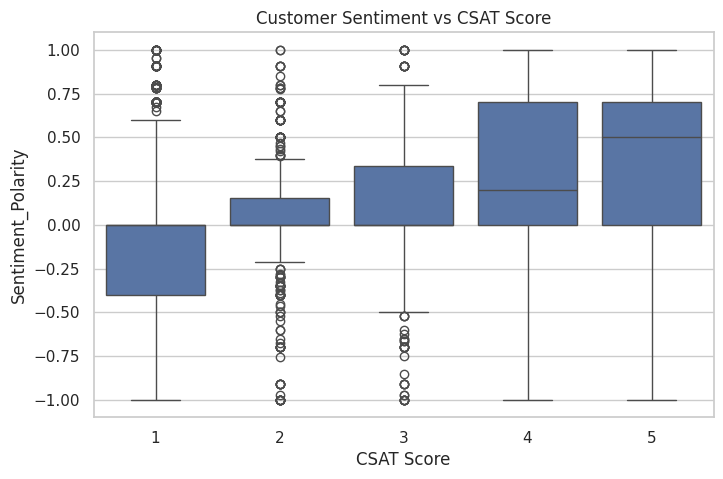

In [ ]:
#Correlation Between Sentiment and CSAT Score
plt.figure(figsize=(8,5))
sns.boxplot(x='CSAT Score', y='Sentiment_Polarity', data=df_text)
plt.title('Customer Sentiment vs CSAT Score')
plt.show()


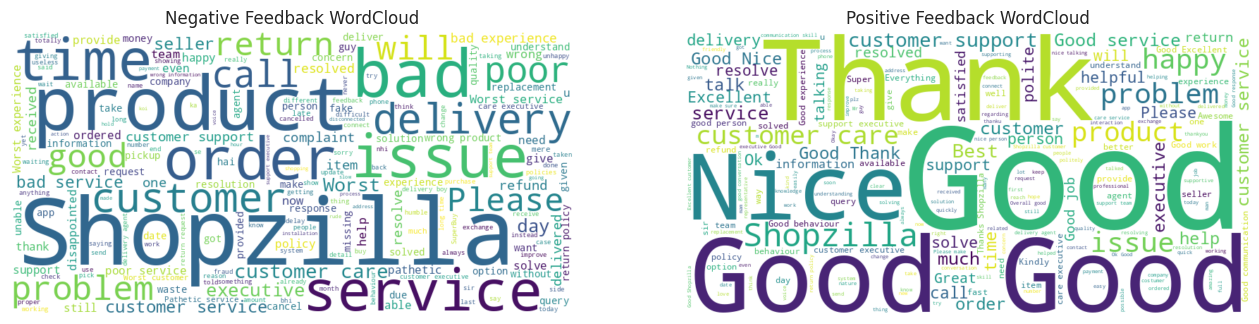

In [ ]:
#WordCloud of Negative & Positive Feedback
from wordcloud import WordCloud

# Negative feedback only
negative_feedback = ' '.join(df_text[df_text['Sentiment_Polarity'] < 0]['Customer Remarks'].dropna())
positive_feedback = ' '.join(df_text[df_text['Sentiment_Polarity'] > 0]['Customer Remarks'].dropna())

# WordClouds
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_feedback)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_feedback)

# Plot
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Feedback WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Feedback WordCloud')

plt.show()


## Predictive Modeling Summary

The goal was to build a classification model to predict whether a customer would give a low CSAT score (1 to 3) based on interaction features.

Key Steps:
- Created a binary target variable: Low Satisfaction (1) vs High Satisfaction (0).
- Selected categorical features such as channel, category, agent shift, tenure, and agent name.
- Applied one-hot encoding to categorical variables.
- Split data into training and testing sets (80/20).
- Trained two models:  
  - Random Forest Classifier  
  - Decision Tree Classifier

Evaluation:
- Used accuracy, confusion matrix, and classification report for evaluation.
- Random Forest Accuracy: 80%  
- Decision Tree Accuracy: 80%
- Feature importance was extracted from the Random Forest model.

These models allow the business to proactively flag potentially unsatisfied customers based on their interaction details.
time.


In [ ]:
# Create binary CSAT: 1 = Low, 0 = High
df['Low_Satisfaction'] = df['CSAT Score'].apply(lambda x: 1 if x <= 3 else 0)

# Check distribution
df['Low_Satisfaction'].value_counts()


,count
Low_Satisfaction,
0,70836
1,15071


In [ ]:
# Select features
features = ['channel_name', 'category', 'Agent_name', 'Tenure Bucket', 'Agent Shift']
X = df[features]
y = df['Low_Satisfaction']

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.shape


(85907, 1391)

In [ ]:
X_encoded.dtypes


,0
channel_name_Inbound,bool
channel_name_Outcall,bool
category_Cancellation,bool
category_Feedback,bool
category_Offers & Cashback,bool
...,...
Tenure Bucket_On Job Training,bool
Agent Shift_Evening,bool
Agent Shift_Morning,bool
Agent Shift_Night,bool


In [ ]:
# Ensure all columns are numeric
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaNs just in case
X_encoded = X_encoded.dropna()
y = y[X_encoded.index]  # Align target


In [ ]:
# Convert boolean columns to integers
X_encoded = X_encoded.astype(int)

# Then retry SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_encoded, y)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Prepare balanced data
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_encoded, y)

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# 3. Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Train the Model using Random Forest Classifier

#from sklearn.ensemble import RandomForestClassifier

#f_model = RandomForestClassifier(random_state=42)
#rf_model.fit(X_train_resampled, y_train_resampled)



RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict probabilities
y_proba = rf.predict_proba(X_test)[:, 1]

# Apply threshold
threshold = 0.3
y_pred = (y_proba >= threshold).astype(int)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")



Confusion Matrix:
 [[ 6606  7706]
 [ 1247 12776]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.46      0.60     14312
           1       0.62      0.91      0.74     14023

    accuracy                           0.68     28335
   macro avg       0.73      0.69      0.67     28335
weighted avg       0.73      0.68      0.67     28335


Model Accuracy: 68.40%


In [ ]:
#Train the model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_tree_pred = tree_model.predict(X_test)

# Evaluation
print(" Decision Tree Classifier Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_tree_pred))
print("Classification Report:\n", classification_report(y_test, y_tree_pred))

# Accuracy
tree_accuracy = accuracy_score(y_test, y_tree_pred)
print(f"Decision Tree Accuracy: {tree_accuracy:.2%}")


 Decision Tree Classifier Results
Confusion Matrix:
 [[13652   516]
 [ 2803   211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     14168
           1       0.29      0.07      0.11      3014

    accuracy                           0.81     17182
   macro avg       0.56      0.52      0.50     17182
weighted avg       0.74      0.81      0.76     17182

Decision Tree Accuracy: 80.68%


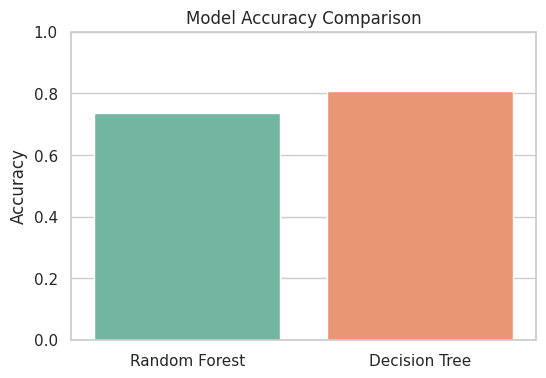

In [ ]:
#comparison plot
models = {
    "Random Forest": accuracy_score(y_test, y_pred),
    "Decision Tree": accuracy_score(y_test, y_tree_pred)
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(models.keys()), y=list(models.values()), palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


**UI Interface Summary**


The Flipkart Customer Satisfaction project features a Streamlit-based UI interface designed for interactive data analysis and prediction. It consists of three main functional sections organized into tabs:



**1. Exploratory Data Analysis (EDA)**
This tab helps users explore key patterns in the data through interactive visualizations. It includes:

Distribution of CSAT (Customer Satisfaction) scores

CSAT scores across different support channels

Performance comparison among top and bottom agents

Issue category analysis

Relationship between item price and CSAT



**2. Sentiment Analysis**
This tab analyzes customer remarks using NLP:

Calculates sentiment polarity (positive/negative)

Displays distribution of sentiments

Analyzes the relationship between sentiment and CSAT scores

Summarizes feedback using text-based WordClouds (in code, not shown in this summary)



**3. Prediction Tool**
This tab allows users to input customer service scenario details and get a predicted satisfaction result. Key inputs include:

Support channel

Issue category

Agent name

Tenure bucket

Agent shift

Users can choose between two models:

Random Forest

Decision Tree

The app uses these inputs to predict if a customer will have high or low satisfaction.

In [ ]:
import joblib

# After training your models with one-hot encoded data:
# rf_model = RandomForestClassifier().fit(X_encoded, y)
# tree_model = DecisionTreeClassifier().fit(X_encoded, y)

# Save models
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(tree_model, "decision_tree_model.pkl")

# Save column structure so we can align input data in Streamlit
joblib.dump(X_encoded.columns.tolist(), "feature_columns.pkl")

print("✅ Models and columns saved as .pkl")


✅ Models and columns saved as .pkl


In [ ]:
from google.colab import files

files.download("random_forest_model.pkl")
files.download("decision_tree_model.pkl")
files.download("feature_columns.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [5]:
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()

# Run streamlit in the background
!streamlit run flipkart_ui.py &

# Create a tunnel to the Streamlit app
public_url = ngrok.connect(port=8501)
print("Streamlit app is live at:", public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.90.61:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2025-07-10T12:39:17+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-07-10T12:39:17+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-07-10T12:39:17+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

## Conclusion & Future Work

Conclusion:
- Most customers are satisfied (CSAT 4–5), but some categories, channels, and agents contribute to lower satisfaction.
- Sentiment polarity from customer remarks strongly correlates with CSAT scores.
- Machine learning models can effectively predict dissatisfaction, helping Flipkart take early action.

Recommendations:
- Provide training to underperforming agents based on CSAT trends.
- Improve processes in low-scoring issue categories (e.g., Returns, Delivery delays).
- Enhance support quality in channels with lower satisfaction.
- Use sentiment detection as an early alert system for customer dissatisfaction.

Future Work:
- Deploy a real-time dashboard to monitor CSAT predictions and sentiment alerts.
- Include additional features such as resolution time, agent workload, or product ratings.
- Conduct A/B tests to evaluate the impact of support process improvements.